In [1]:
#!pip install download

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
from datetime import datetime 
from download import download
from __future__ import absolute_import,division,print_function,unicode_literals

mpl.rcParams['figure.figsize'] =(8,6)
mpl.rcParams['axes.grid'] = False

In [3]:
def convert_to_date(x):
    return datetime.strptime(x,'%Y %m %d %H')


file_path = '../datasets/beijing+multi+site+air+quality+data/PRSA_Data_Dingling_20130301-20170228.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', parse_dates=[['year' ,'month','day','hour']], date_parser=convert_to_date ,keep_date_col=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13168\549389098.py:6: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', parse_dates=[['year' ,'month','day','hour']], date_parser=convert_to_date ,keep_date_col=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13168\549389098.py:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path, encoding='ISO-8859-1', parse_dates=[['year' ,'month','day','hour']], date_parser=convert_to_date ,keep_date_col=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_13168\549389098.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and t

In [4]:
df

year_month_day_hour     No  year month day hour  PM2.5  PM10  SO2  NO2  \
0     2013-03-01 00:00:00      1  2013     3   1    0    4.0   4.0  3.0  NaN   
1     2013-03-01 01:00:00      2  2013     3   1    1    7.0   7.0  3.0  NaN   
2     2013-03-01 02:00:00      3  2013     3   1    2    5.0   5.0  3.0  2.0   
3     2013-03-01 03:00:00      4  2013     3   1    3    6.0   6.0  3.0  NaN   
4     2013-03-01 04:00:00      5  2013     3   1    4    5.0   5.0  3.0  NaN   
...                   ...    ...   ...   ...  ..  ...    ...   ...  ...  ...   
35059 2017-02-28 19:00:00  35060  2017     2  28   19   11.0  11.0  2.0  2.0   
35060 2017-02-28 20:00:00  35061  2017     2  28   20   13.0  13.0  2.0  2.0   
35061 2017-02-28 21:00:00  35062  2017     2  28   21    9.0  14.0  2.0  2.0   
35062 2017-02-28 22:00:00  35063  2017     2  28   22   10.0  12.0  2.0  2.0   
35063 2017-02-28 23:00:00  35064  2017     2  28   23   13.0  16.0  4.0  9.0   

          CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      200.0   82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1      200.0   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2      200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3      200.0   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4      200.0   81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...      ...    ...   ...     ...   ...   ...  ...   ...       ...  
35059  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 19 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [6]:
#converting month from object to numeric

df['month'] = pd.to_numeric(df['month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  int64         
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [7]:
df.isnull().sum()

year_month_day_hour       0
No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(35064, 19)

In [10]:
df.describe()

year_month_day_hour            No         month         PM2.5  \
count                35064  35064.000000  35064.000000  34285.000000   
mean   2015-03-01 11:30:00  17532.500000      6.522930     65.989497   
min    2013-03-01 00:00:00      1.000000      1.000000      3.000000   
25%    2014-03-01 05:45:00   8766.750000      4.000000     14.000000   
50%    2015-03-01 11:30:00  17532.500000      7.000000     41.000000   
75%    2016-02-29 17:15:00  26298.250000     10.000000     93.000000   
max    2017-02-28 23:00:00  35064.000000     12.000000    881.000000   
std                    NaN  10122.249256      3.448752     72.267723   

               PM10           SO2           NO2            CO            O3  \
count  34408.000000  34334.000000  33830.000000  33052.000000  33850.000000   
mean      83.739723     11.749650     27.585467    904.896073     68.548371   
min        2.000000      0.285600      1.026500    100.000000      0.214200   
25%       26.000000      2.000000      9.000000    300.000000     31.000000   
50%       60.000000      5.000000     19.000000    600.000000     61.000000   
75%      117.000000     15.000000     38.000000   1200.000000     90.000000   
max      905.000000    156.000000    205.000000  10000.000000    500.000000   
std       79.541685     15.519259     26.383882    903.306220     53.764424   

               TEMP          PRES          DEWP          RAIN          WSPM  
count  35011.000000  35014.000000  35011.000000  35013.000000  35021.000000  
mean      13.686111   1007.760278      1.505495      0.060366      1.853836  
min      -16.600000    982.400000    -35.100000      0.000000      0.000000  
25%        3.400000    999.300000    -10.200000      0.000000      1.000000  
50%       14.700000   1007.400000      1.800000      0.000000      1.500000  
75%       23.300000   1016.000000     14.200000      0.000000      2.300000  
max       41.400000   1036.500000     27.200000     52.100000     10.000000  
std       11.365313     10.225664     13.822099      0.752899      1.309808

In [11]:
df_copy = df.copy()

In [12]:
df = df.set_index('year_month_day_hour')

In [13]:
df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [14]:
df.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [15]:
df.loc['2013-03-01':'2013-03-03']

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   
...                  ..   ...    ...  ..  ...    ...   ...  ...  ...    ...   
2013-03-03 19:00:00  68  2013      3   3   19   11.0  46.0  3.0  2.0  200.0   
2013-03-03 20:00:00  69  2013      3   3   20    5.0  42.0  3.0  2.0  200.0   
2013-03-03 21:00:00  70  2013      3   3   21   12.0  34.0  3.0  2.0  200.0   
2013-03-03 22:00:00  71  2013      3   3   22    4.0  31.0  7.0  8.0  500.0   
2013-03-03 23:00:00  72  2013      3   3   23   14.0  38.0  4.0  4.0  300.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...                   ...   ...     ...   ...   ...  ...   ...       ...  
2013-03-03 19:00:00  83.0   8.9  1010.0 -13.5   0.0   NW   0.9  Dingling  
2013-03-03 20:00:00  82.0   7.7  1010.1 -12.2   0.0  ENE   0.5  Dingling  
2013-03-03 21:00:00  79.0   6.9  1010.6 -12.3   0.0    N   0.7  Dingling  
2013-03-03 22:00:00  61.0   6.8  1011.2 -11.9   0.0   NE   1.5  Dingling  
2013-03-03 23:00:00  68.0   8.6  1012.1 -11.4   0.0   NE   2.0  Dingling  

[72 rows x 18 columns]

In [16]:
df.loc['2013':'2014']

No  year  month day hour  PM2.5  PM10  SO2  NO2  \
year_month_day_hour                                                       
2013-03-01 00:00:00      1  2013      3   1    0    4.0   4.0  3.0  NaN   
2013-03-01 01:00:00      2  2013      3   1    1    7.0   7.0  3.0  NaN   
2013-03-01 02:00:00      3  2013      3   1    2    5.0   5.0  3.0  2.0   
2013-03-01 03:00:00      4  2013      3   1    3    6.0   6.0  3.0  NaN   
2013-03-01 04:00:00      5  2013      3   1    4    5.0   5.0  3.0  NaN   
...                    ...   ...    ...  ..  ...    ...   ...  ...  ...   
2014-12-31 19:00:00  16100  2014     12  31   19    7.0  37.0  2.0  2.0   
2014-12-31 20:00:00  16101  2014     12  31   20    NaN   NaN  NaN  NaN   
2014-12-31 21:00:00  16102  2014     12  31   21    NaN   NaN  NaN  NaN   
2014-12-31 22:00:00  16103  2014     12  31   22    NaN   NaN  NaN  NaN   
2014-12-31 23:00:00  16104  2014     12  31   23    NaN   NaN  NaN  NaN   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                     
2013-03-01 00:00:00  200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00  200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00  200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00  200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00  200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                    ...   ...   ...     ...   ...   ...  ...   ...   
2014-12-31 19:00:00  300.0  69.0  -2.3  1015.0 -24.8   0.0   NW   2.2   
2014-12-31 20:00:00    NaN   NaN  -2.5  1014.0 -24.3   0.0  NNW   2.3   
2014-12-31 21:00:00    NaN   NaN  -3.1  1012.0 -23.5   0.0   NW   1.4   
2014-12-31 22:00:00    NaN   NaN  -3.0  1014.0 -23.4   0.0   NW   2.7   
2014-12-31 23:00:00    NaN   NaN  -3.5  1012.0 -22.7   0.0    E   1.4   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2014-12-31 19:00:00  Dingling  
2014-12-31 20:00:00  Dingling  
2014-12-31 21:00:00  Dingling  
2014-12-31 22:00:00  Dingling  
2014-12-31 23:00:00  Dingling  

[16104 rows x 18 columns]

<Axes: xlabel='year_month_day_hour'>

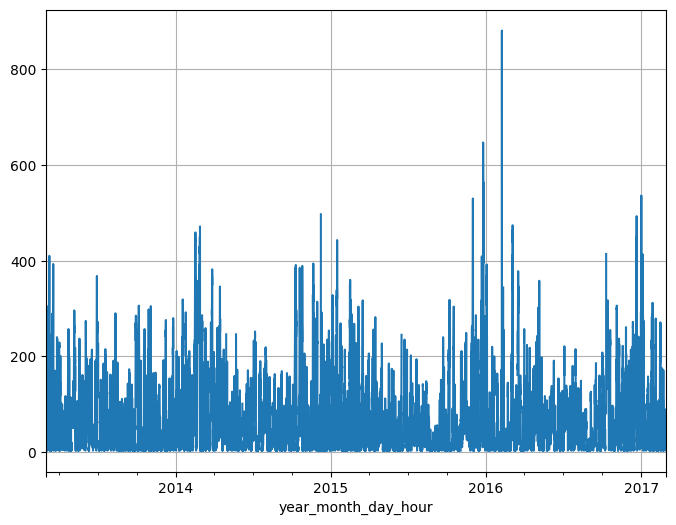

In [17]:
df['PM2.5'].plot(grid =True)

<Axes: xlabel='year_month_day_hour'>

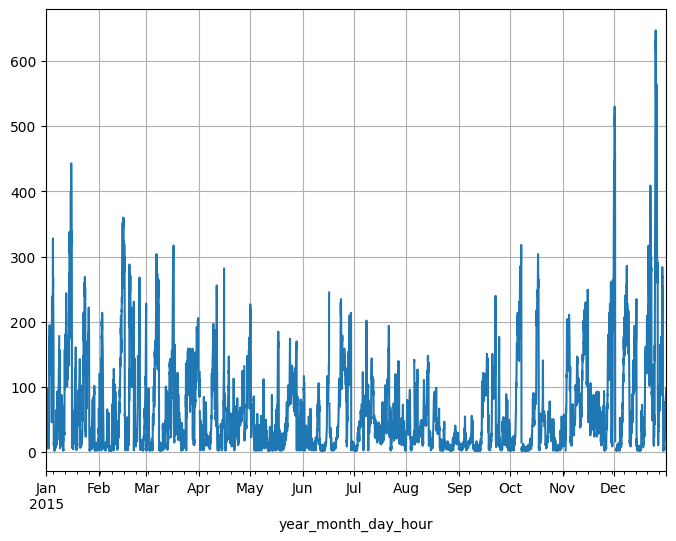

In [18]:
df['PM2.5'].loc['2015'].plot(grid =True)

<Axes: xlabel='year_month_day_hour'>

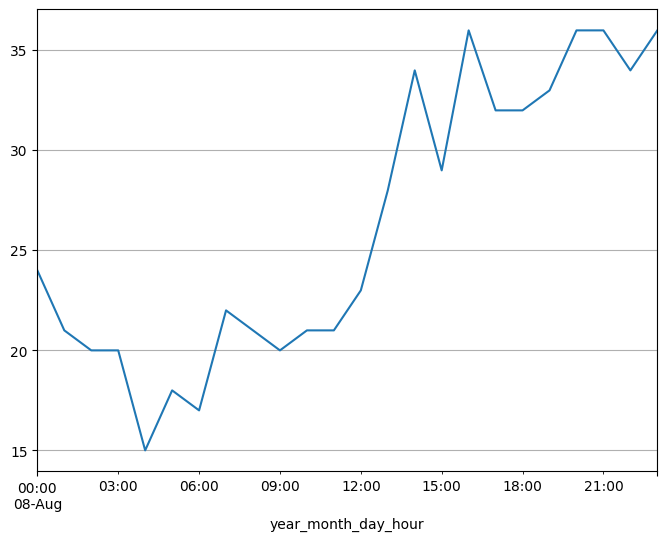

In [19]:
df['PM2.5'].loc['2015-08-08'].plot(grid =True)

In [20]:
import plotly.express as px
fig = px.line(df_copy,x='year_month_day_hour', y='PM2.5', title='PM2.5 with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [23]:
fig  = px.line(df_copy,x='year_month_day_hour', y='PM2.5' ,title='PM2.5 with slider')
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector = dict(buttons =list([
                  dict(count=1,label='1y', step='year',stepmode='backward'),
                  dict(count=2,label='2y',step='year',stepmode='backward'),
                  dict(count=3,label='3y',step='year',stepmode='backward'),
                  dict(step='all')
                 ])))
fig.show()

In [27]:
fig  = px.line(df_copy,x='year_month_day_hour', y='PM2.5' ,title='PM2.5 with slider')
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector = dict(buttons =list([
                  dict(count=1,label='1y', step='day',stepmode='todate'),
                  dict(count=2,label='2y',step='month',stepmode='todate'),
                  dict(count=3,label='3y',step='year',stepmode='todate'),
                  dict(step='all')
                 ])))
fig.show()

In [34]:
df['2013':'2015'][['month','PM2.5']]

month  PM2.5
year_month_day_hour              
2013-03-01 00:00:00      3    4.0
2013-03-01 01:00:00      3    7.0
2013-03-01 02:00:00      3    5.0
2013-03-01 03:00:00      3    6.0
2013-03-01 04:00:00      3    5.0
...                    ...    ...
2015-12-31 19:00:00     12   85.0
2015-12-31 20:00:00     12    NaN
2015-12-31 21:00:00     12   80.0
2015-12-31 22:00:00     12   93.0
2015-12-31 23:00:00     12   98.0

[24864 rows x 2 columns]

In [35]:
df['2013':'2015'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                        
        count        mean         std  min   25%   50%     75%    max
month                                                                
1      1451.0   78.548518   77.606663  3.0  14.0  51.0  123.50  443.0
2      1292.0  113.558050  113.420308  3.0  16.0  74.0  178.25  548.0
3      2225.0   84.659236   83.327537  3.0  15.0  54.0  136.00  410.0
4      2111.0   66.175651   58.721103  3.0  20.0  51.0   92.50  346.0
5      2177.0   54.744006   48.446153  3.0  18.0  42.0   78.00  296.0
6      2117.0   58.943222   58.103654  3.0  15.0  36.0   92.00  368.0
7      2182.0   60.721173   52.863268  3.0  19.0  45.0   91.00  252.0
8      2216.0   45.572608   41.557403  3.0  14.0  31.0   68.00  290.0
9      2126.0   51.903857   51.839336  3.0  12.0  34.0   82.00  285.0
10     2166.0   81.413204   92.319465  3.0  13.0  42.0  118.00  391.0
11     2144.0   67.932276   70.321799  3.0  14.0  45.0   95.00  394.0
12     2193.0   73.191518   95.349242  3.0  10.0  34.0  105.00  647.0

In [48]:
df['2014':'2014']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2014-01-01 00:00:00   7345  2014      1   1    0   27.0  104.0  12.0   9.0   
2014-01-01 01:00:00   7346  2014      1   1    1   25.0   86.0  12.0   9.0   
2014-01-01 02:00:00   7347  2014      1   1    2   27.0   85.0  14.0   9.0   
2014-01-01 03:00:00   7348  2014      1   1    3   34.0   98.0  19.0  15.0   
2014-01-01 04:00:00   7349  2014      1   1    4   32.0  102.0  18.0  15.0   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2014-12-31 19:00:00  16100  2014     12  31   19    7.0   37.0   2.0   2.0   
2014-12-31 20:00:00  16101  2014     12  31   20    NaN    NaN   NaN   NaN   
2014-12-31 21:00:00  16102  2014     12  31   21    NaN    NaN   NaN   NaN   
2014-12-31 22:00:00  16103  2014     12  31   22    NaN    NaN   NaN   NaN   
2014-12-31 23:00:00  16104  2014     12  31   23    NaN    NaN   NaN   NaN   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                     
2014-01-01 00:00:00    NaN   NaN   6.8  1003.7 -15.9   0.0  WSW   5.2   
2014-01-01 01:00:00  500.0  63.0   6.5  1003.6 -16.2   0.0    W   3.6   
2014-01-01 02:00:00  400.0  63.0   6.4  1003.4 -15.6   0.0  WNW   5.3   
2014-01-01 03:00:00  400.0  56.0   6.2  1002.9 -15.8   0.0  WNW   4.7   
2014-01-01 04:00:00  400.0  33.0   6.1  1002.7 -15.2   0.0    W   3.5   
...                    ...   ...   ...     ...   ...   ...  ...   ...   
2014-12-31 19:00:00  300.0  69.0  -2.3  1015.0 -24.8   0.0   NW   2.2   
2014-12-31 20:00:00    NaN   NaN  -2.5  1014.0 -24.3   0.0  NNW   2.3   
2014-12-31 21:00:00    NaN   NaN  -3.1  1012.0 -23.5   0.0   NW   1.4   
2014-12-31 22:00:00    NaN   NaN  -3.0  1014.0 -23.4   0.0   NW   2.7   
2014-12-31 23:00:00    NaN   NaN  -3.5  1012.0 -22.7   0.0    E   1.4   

                      station  
year_month_day_hour            
2014-01-01 00:00:00  Dingling  
2014-01-01 01:00:00  Dingling  
2014-01-01 02:00:00  Dingling  
2014-01-01 03:00:00  Dingling  
2014-01-01 04:00:00  Dingling  
...                       ...  
2014-12-31 19:00:00  Dingling  
2014-12-31 20:00:00  Dingling  
2014-12-31 21:00:00  Dingling  
2014-12-31 22:00:00  Dingling  
2014-12-31 23:00:00  Dingling  

[8760 rows x 18 columns]

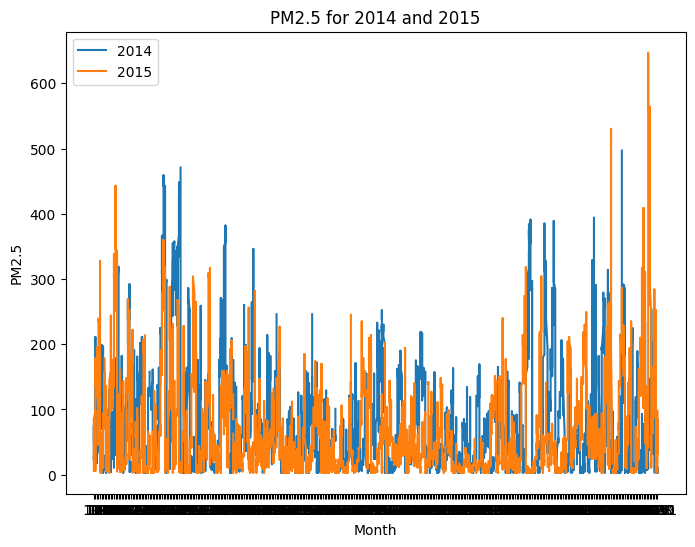

In [45]:
df_14 = df['2014':'2014'].reset_index()
df_15 = df['2015':'2015'].reset_index()
df_14['month_day_hour'] = df_14.apply(lambda x: str(x['month'])+ '-' + str(x['day']),axis=1)
df_15['month_day_hour'] = df_15.apply(lambda x: str(x['month']) + '-' + str(x['day']),axis=1)
plt.plot(df_14['month_day_hour'], df_14['PM2.5'])
plt.plot(df_15['month_day_hour'],df_15['PM2.5'])
plt.legend(['2014','2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('PM2.5 for 2014 and 2015')

plt.show()

In [51]:
df['2013':'2015'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['max'],'TEMP':['min','max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -10.6  12.4
2      548.0 -10.9  14.0
3      410.0  -6.4  26.0
4      346.0   1.0  32.0
5      296.0   7.6  41.4
6      368.0  15.1  37.4
7      252.0  16.8  39.2
8      290.0  16.6  37.7
9      285.0   8.9  34.5
10     391.0   1.5  27.5
11     394.0 -10.3  20.8
12     647.0  -9.7  14.2

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

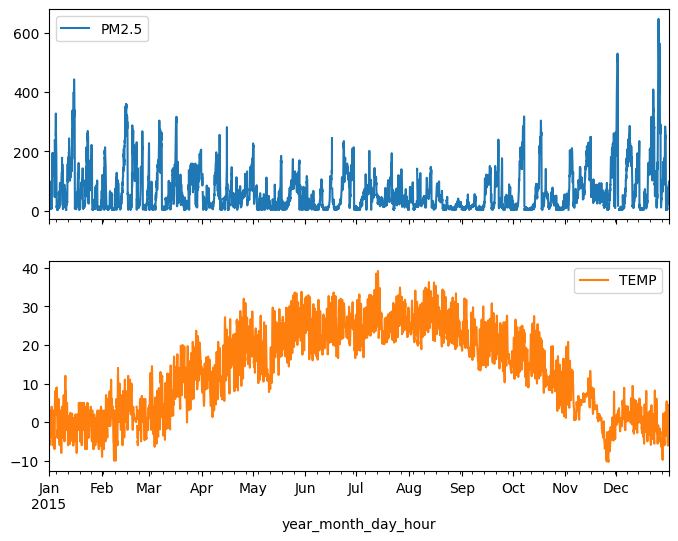

In [54]:
df['2015':'2015'][['PM2.5','TEMP']].plot(subplots=True)
#relation between PM2.5 and TEMP

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'TEMP'}>]], dtype=object)

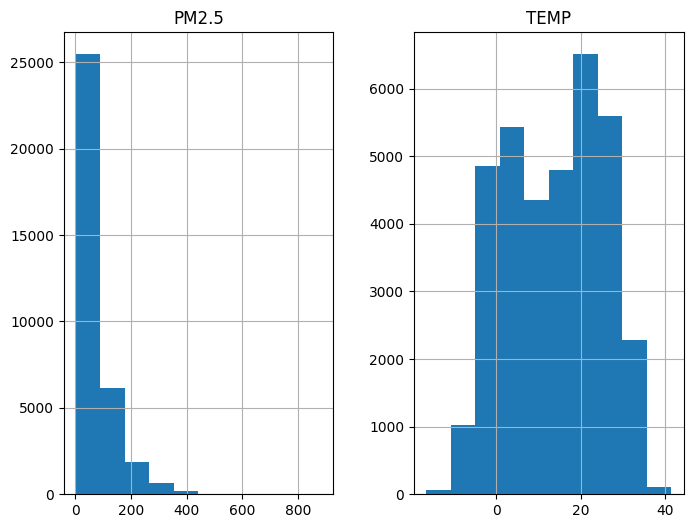

In [56]:
df[['PM2.5','TEMP']].hist()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

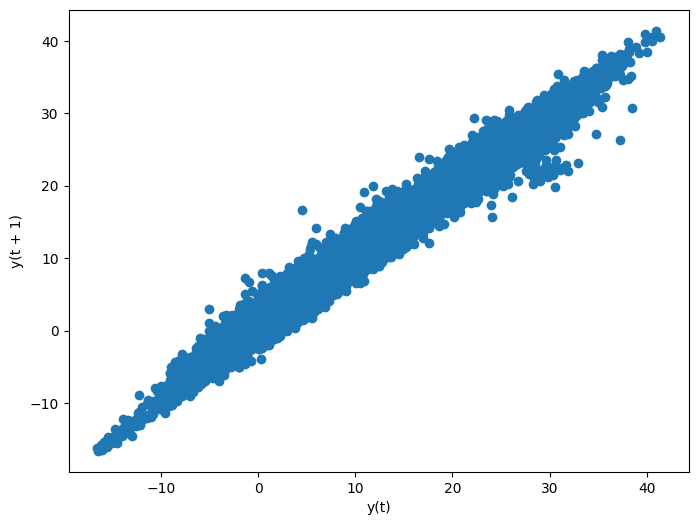

In [57]:
pd.plotting.lag_plot(df['TEMP'], lag=1) #since data is 1 hour, 1 here means 1 hour lag period

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

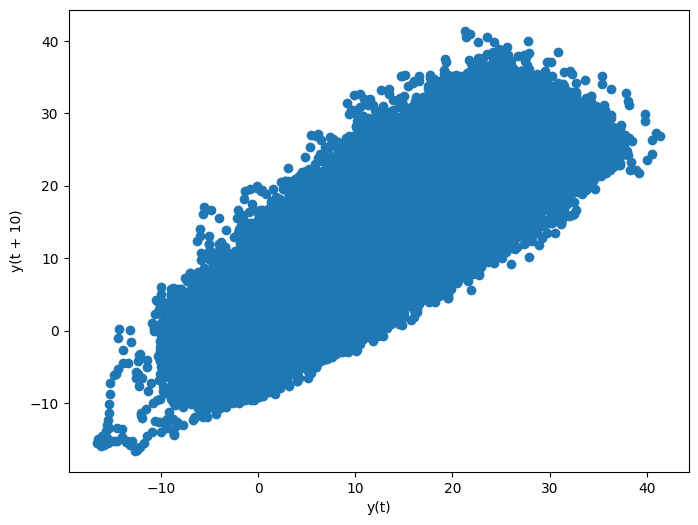

In [58]:
pd.plotting.lag_plot(df['TEMP'],lag=10)  #10 hour lag period

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

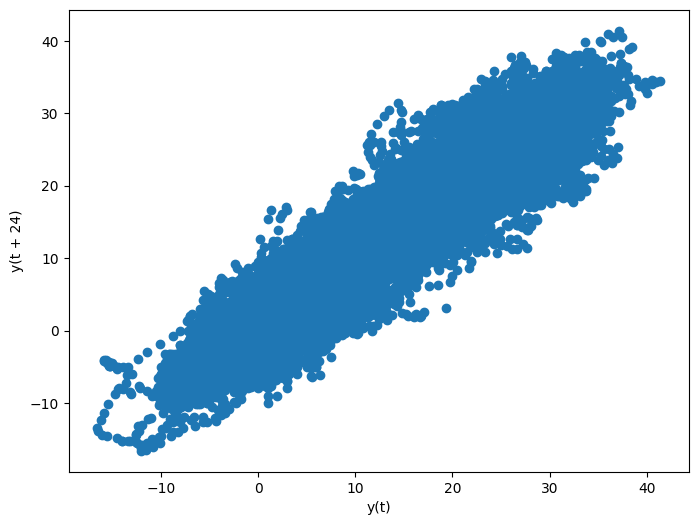

In [59]:
pd.plotting.lag_plot(df['TEMP'],lag=24)  #1 day lag

<Axes: xlabel='y(t)', ylabel='y(t + 8760)'>

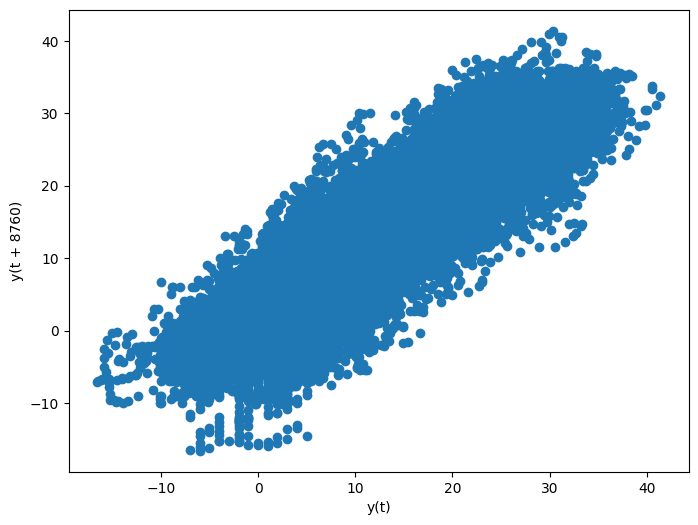

In [60]:
pd.plotting.lag_plot(df['TEMP'],lag=24*365)

<Axes: xlabel='y(t)', ylabel='y(t + 4320)'>

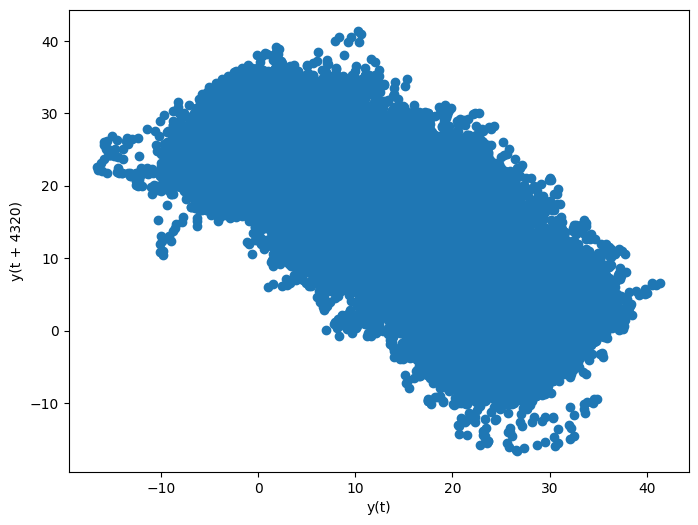

In [62]:
pd.plotting.lag_plot(df['TEMP'],lag=4320) #6 months

<Axes: xlabel='y(t)', ylabel='y(t + 2160)'>

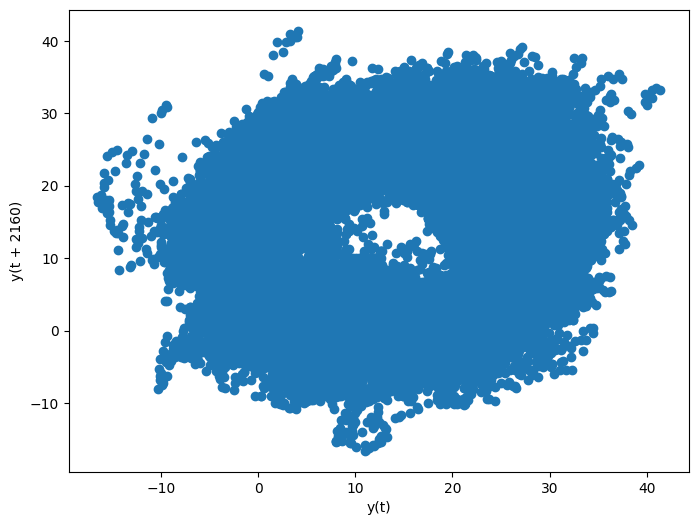

In [64]:
pd.plotting.lag_plot(df['TEMP'],lag=2160)

Multi-variate

<Axes: xlabel='year_month_day_hour'>

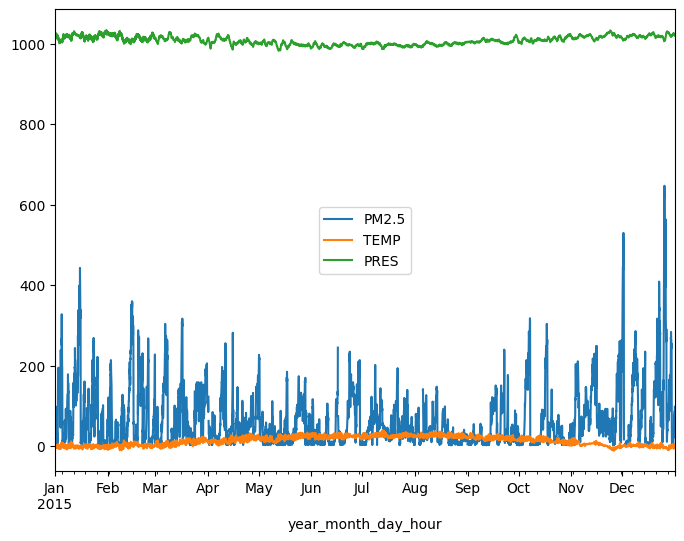

In [65]:
df['2015':'2015'][['PM2.5','TEMP','PRES']].plot()

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

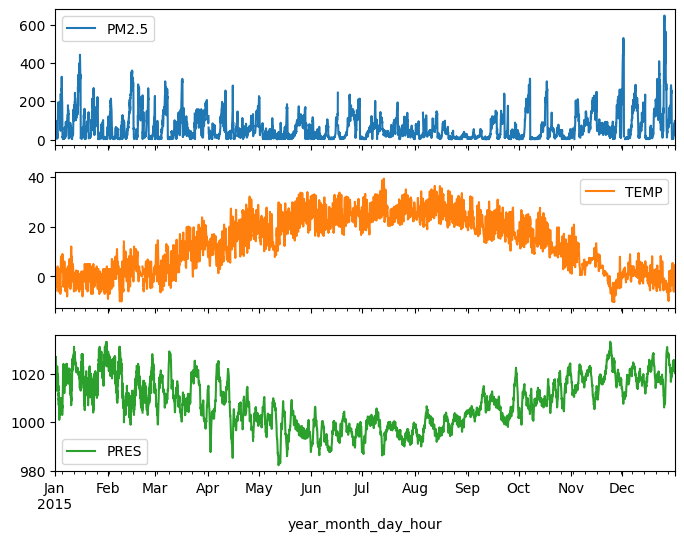

In [66]:
df['2015':'2015'][['PM2.5','TEMP','PRES']].plot(subplots=True)

In [67]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

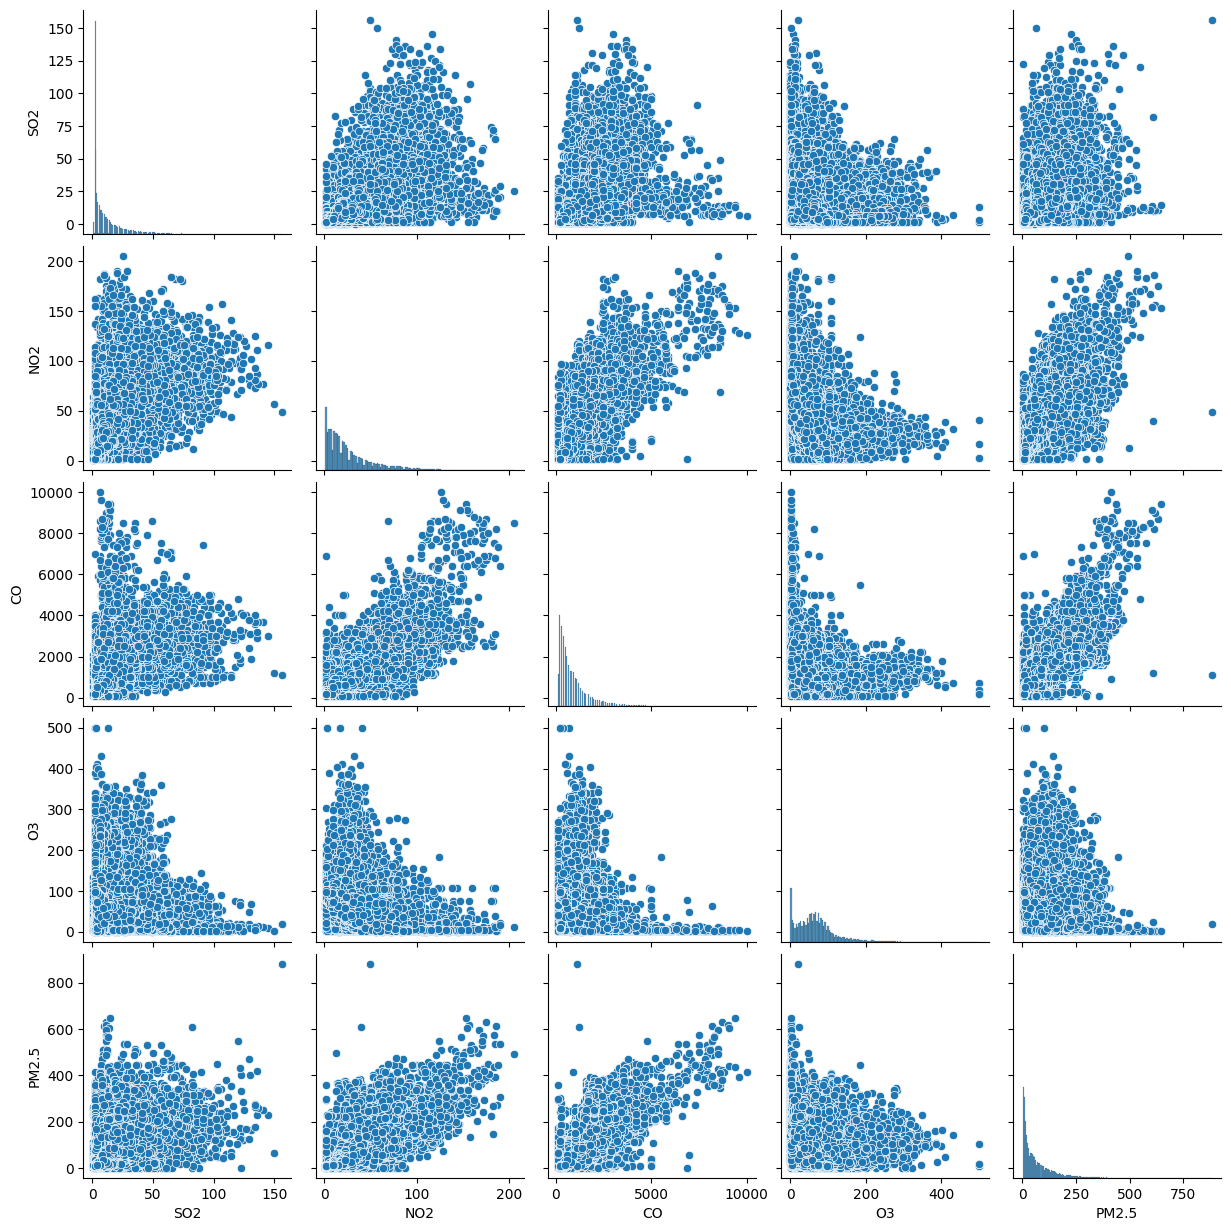

In [68]:
sns.pairplot(df[['SO2','NO2','CO','O3','PM2.5']])

In [69]:
corr = df[['SO2','NO2','CO','O3','PM2.5']].corr(method='pearson')
corr

SO2       NO2        CO        O3     PM2.5
SO2    1.000000  0.610433  0.529182 -0.182096  0.475117
NO2    0.610433  1.000000  0.798753 -0.373625  0.718170
CO     0.529182  0.798753  1.000000 -0.303275  0.802737
O3    -0.182096 -0.373625 -0.303275  1.000000 -0.100542
PM2.5  0.475117  0.718170  0.802737 -0.100542  1.000000

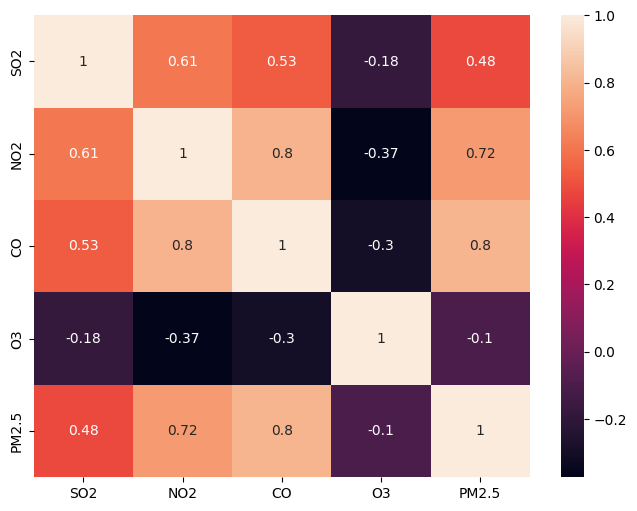

In [73]:
heatmap = sns.heatmap(corr, annot=True)

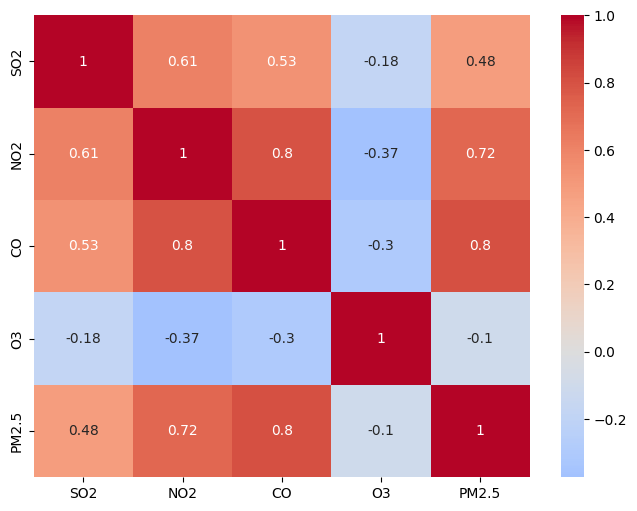

In [75]:
heatmap = sns.heatmap(corr,center=0, annot=True,cmap='coolwarm')

In [76]:
df['2013':'2015'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['max'],'TEMP':['min','max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -10.6  12.4
2      548.0 -10.9  14.0
3      410.0  -6.4  26.0
4      346.0   1.0  32.0
5      296.0   7.6  41.4
6      368.0  15.1  37.4
7      252.0  16.8  39.2
8      290.0  16.6  37.7
9      285.0   8.9  34.5
10     391.0   1.5  27.5
11     394.0 -10.3  20.8
12     647.0  -9.7  14.2

In [77]:
df[['PM2.5','wd']].groupby('wd').agg({'PM2.5':['min','max','mean']})

PM2.5                  
      min    max       mean
wd                         
E     3.0  434.0  88.623363
ENE   3.0  647.0  77.685514
ESE   3.0  632.0  96.492276
N     3.0  536.0  57.546221
NE    3.0  530.0  57.390083
NNE   3.0  881.0  53.946239
NNW   3.0  548.0  62.790775
NW    3.0  535.0  52.769116
S     3.0  511.0  72.497281
SE    3.0  617.0  85.045709
SSE   3.0  614.0  79.925967
SSW   3.0  493.0  73.078253
SW    3.0  459.0  70.233140
W     3.0  446.0  49.488104
WNW   3.0  515.0  37.307447
WSW   3.0  451.0  66.725926

In [78]:
df_dropna = df.copy()
df_dropna = df.dropna()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

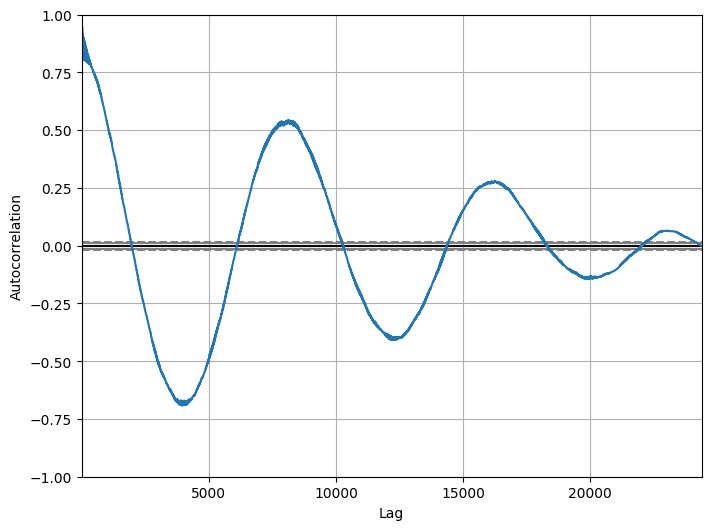

In [79]:
pd.plotting.autocorrelation_plot(df_dropna['2014':'2016']['TEMP'])

#we can see it rise and have postive value after 8000 (around 1 year)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

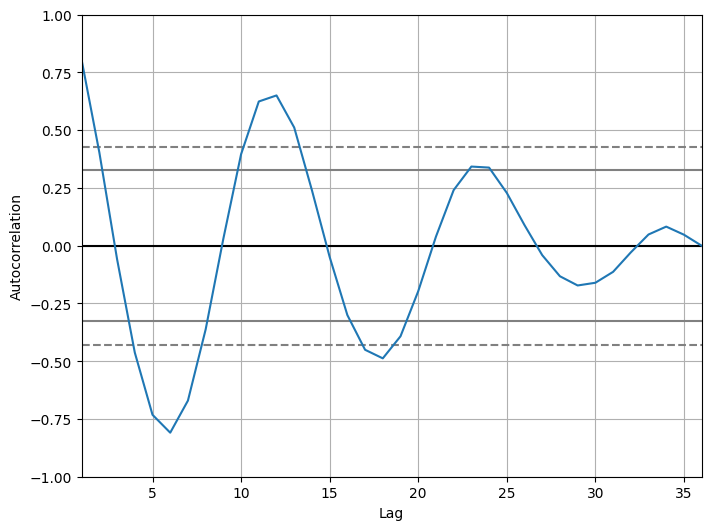

In [85]:
pd.plotting.autocorrelation_plot(df_dropna['2014':'2016']['TEMP'].resample('1ME').mean())
#resampled for 1 month by mean, we can expect positve peak at each 12 months

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

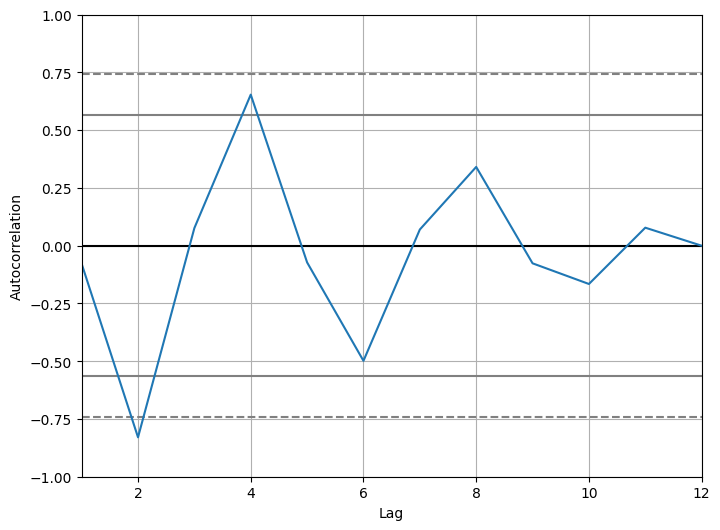

In [89]:
pd.plotting.autocorrelation_plot(df_dropna['2014':'2016']['TEMP'].resample('1QE').mean())
#resampled for 1 month by mean, we can expect positve peak at each 12 months